https://twitter.com/yosaytouchgot/status/1668240209354592257

In [1]:
m = Threads.nthreads()

12

In [ ]:
using Plots
default(fmt=:png)
using SharedArrays
using Distributed

using SymPy
@show x = symbols("x")
@show F = sin(x)
@show G = F.integrate(x)
@show Gexpr = Meta.parse(string(G))

addprocs(m)
@everywhere begin
    @eval g(x) = $Gexpr
end

function makedata(m = m)
    data = SharedArray{Float64}(100, m)
    t = range(0, 2pi, 101)[1:end-1]
    @sync @distributed for i in 1:m
        data[:,i] .= g.(i .* t)
    end
    data
end

data = @time makedata(m)
data = @time makedata(m)
data = @time makedata(m)
rmprocs(workers())

plot()
for i in 1:4 plot!(data[:,i]) end
plot!()

x = symbols("x") = x
F = sin(x) = sin(x)
G = F.integrate(x) = -cos(x)
Gexpr = Meta.parse(string(G)) = :(-(cos(x)))


x = symbols("x") = x
F = sin(x) = sin(x)
G = F.integrate(x) = -cos(x)
Gexpr = Meta.parse(string(G)) = :(-(cos(x)))
  0.043413 seconds (102.74 k allocations: 7.025 MiB, 25.21% gc time, 99.91% compilation time)
  0.000031 seconds (1 allocation: 9.500 KiB)
  0.000028 seconds (1 allocation: 9.500 KiB)


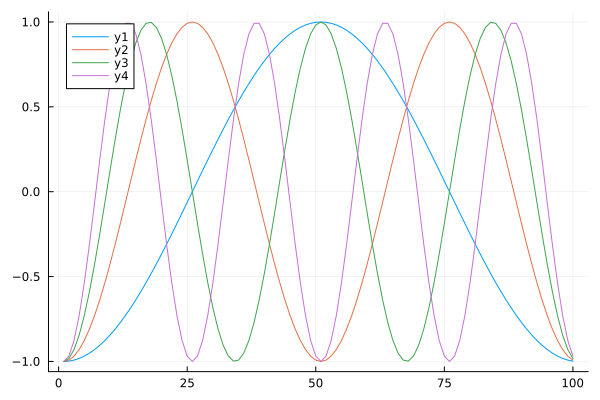

In [5]:
using Plots
default(fmt=:png)

using SymPy
@show x = symbols("x")
@show F = sin(x)
@show G = F.integrate(x)
@show Gexpr = Meta.parse(string(G))
@eval g(x) = $Gexpr

function makedata(m = m)
    data = Matrix{Float64}(undef, 100, m)
    t = range(0, 2pi, 101)[1:end-1]
    for i in 1:m
        data[:,i] .= g.(i .* t)
    end
    data
end

data = @time makedata(m)
data = @time makedata(m)
data = @time makedata(m)

plot()
for i in 1:4 plot!(data[:,i]) end
plot!()

x = symbols("x") = x
F = sin(x) = sin(x)
G = F.integrate(x) = -cos(x)
Gexpr = Meta.parse(string(G)) = :(-(cos(x)))
  0.158945 seconds (216.69 k allocations: 14.591 MiB, 5.50% gc time, 716.31% compilation time)
  0.000174 seconds (76 allocations: 18.000 KiB)
  0.000122 seconds (72 allocations: 17.875 KiB)


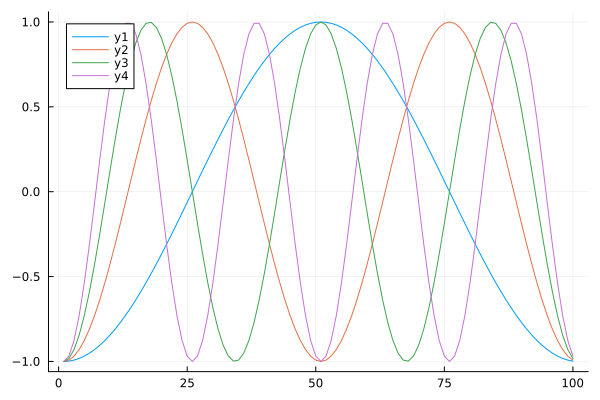

In [3]:
using Plots
default(fmt=:png)

using SymPy
@show x = symbols("x")
@show F = sin(x)
@show G = F.integrate(x)
@show Gexpr = Meta.parse(string(G))
@eval g(x) = $Gexpr

function makedata(m = m)
    data = Matrix{Float64}(undef, 100, m)
    t = range(0, 2π, 101)[1:end-1]
    Threads.@threads for i in 1:m
        data[:,i] .= g.(i .* t)
    end
    data
end

data = @time makedata(m)
data = @time makedata(m)
data = @time makedata(m)
plot()
for i in 1:4 plot!(data[:,i]) end
plot!()

x = symbols("x") = x
F = sin(x) = sin(x)
G = F.integrate(x) = -cos(x)
Gexpr = Meta.parse(string(G)) = :(-(cos(x)))
  0.066385 seconds (256.70 k allocations: 17.501 MiB, 99.93% compilation time)
  0.000029 seconds (1 allocation: 9.500 KiB)
  0.000029 seconds (1 allocation: 9.500 KiB)


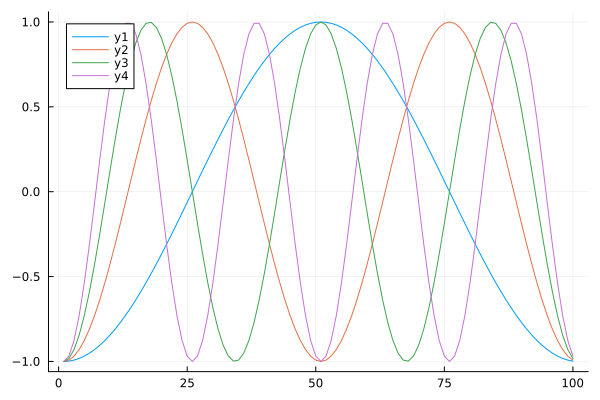

In [4]:
using Plots
default(fmt=:png)

using SymPy
@show x = symbols("x")
@show F = sin(x)
@show G = F.integrate(x)
@show Gexpr = Meta.parse(string(G))
@eval g(x) = $Gexpr

function makedata(m = m)
    t = range(0, 2π, 101)[1:end-1]
    g.((1:m)'.* t)
end

data = @time makedata(m)
data = @time makedata(m)
data = @time makedata(m)
plot()
for i in 1:4 plot!(data[:,i]) end
plot!()